# How to choose simulation SSMF step dz ?

In [4]:
## loading simulation datase:  How to choose dz ?
from optical_flax.dsp import simple_dsp, mimo_dsp
from optical_flax.generate_data import get_data

dz = [15, 7.5, 3.725, 1.5]
data_sml = []
for h in dz:
    path = 'data/sml_data/dataset_dz_' + str(h)
    data = get_data(path)
    data_sml.append(data)
from optical_flax.utils import MSE

for i in range(len(dz)-1):
    print(MSE(data_sml[i].y, data_sml[i+1].y)/MSE(data_sml[i].y, 0))

0.12134558
0.07347986
0.04466462


# impact for result

In [3]:
for i in range(4):
    print(f'Result for dz = {dz[i]} km:')
    data = data_sml[i]
    sig_list2, name2, metric2 = mimo_dsp(data)
    print(metric2)
    print(' ')

Result for dz = 15 km:
            BER       QSq        SNR
dim0   0.058200  3.918352  10.315953
dim1   0.059135  3.874045  10.247962
total  0.058667  3.896158  10.281875
 
Result for dz = 7.5 km:
            BER       QSq        SNR
dim0   0.022175  6.067238  12.694988
dim1   0.021650  6.110486  12.728826
total  0.021913  6.088780  12.711849
 
Result for dz = 3.725 km:
            BER       QSq        SNR
dim0   0.007255  7.763386  14.519436
dim1   0.007290  7.757213  14.497669
total  0.007273  7.760297  14.508555
 
Result for dz = 1.5 km:
            BER       QSq        SNR
dim0   0.002075  9.147127  15.960480
dim1   0.002205  9.088484  15.992659
total  0.002140  9.117451  15.976516
 


# 非线性+衰减效应 求解
Equation:
$$
\frac{\partial A}{\partial z} = -\frac{\alpha}{2}A + i\gamma |A|^2A
$$
solution:
$$
A(z,t) = A(0,t) e^{-\frac{\alpha}{2}z} e^{i\gamma |A(0,t)|^2 L_{eff}(z))}
$$
where
$$
L_{eff}(z) = \frac{1-\exp(-\alpha z)}{\alpha}
$$
Leff有上界：
$$
L_{eff}(z) < \frac{1}{\alpha}
$$

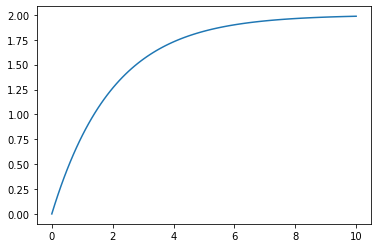

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def Leff(z, alpha = 0.5):
    return (1 - np.exp(-alpha*z)) / alpha

z = np.linspace(0,10,100)
Lz = Leff(z)
plt.plot(z, Lz)